In [26]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture 
from sklearn import metrics
from sklearn.model_selection import train_test_split
import scipy.cluster.hierarchy as shc
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm

import warnings
warnings.filterwarnings(action="ignore")
import os
print(os.listdir("../MMF1922"))

['.ipynb_checkpoints', 'CC GENERAL.csv', 'clustering.ipynb']


In [2]:
data= pd.read_csv("../MMF1922/CC GENERAL.csv")
data.drop('CUST_ID', axis=1, inplace=True) 
print(data.shape)
data.head()

(8950, 17)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [4]:
data.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531283,0.322802,0.398684,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095843,0.065008,0.132569,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356963,0.603264,0.093860,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319724,0.567292,0.048755,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256499,0.384084,0.132172,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303985,0.453238,0.140107,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119788,0.103464,0.003030,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295038,0.243537,-0.030327,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060755,0.085551,0.030073,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.098838,-0.249773,-0.133372


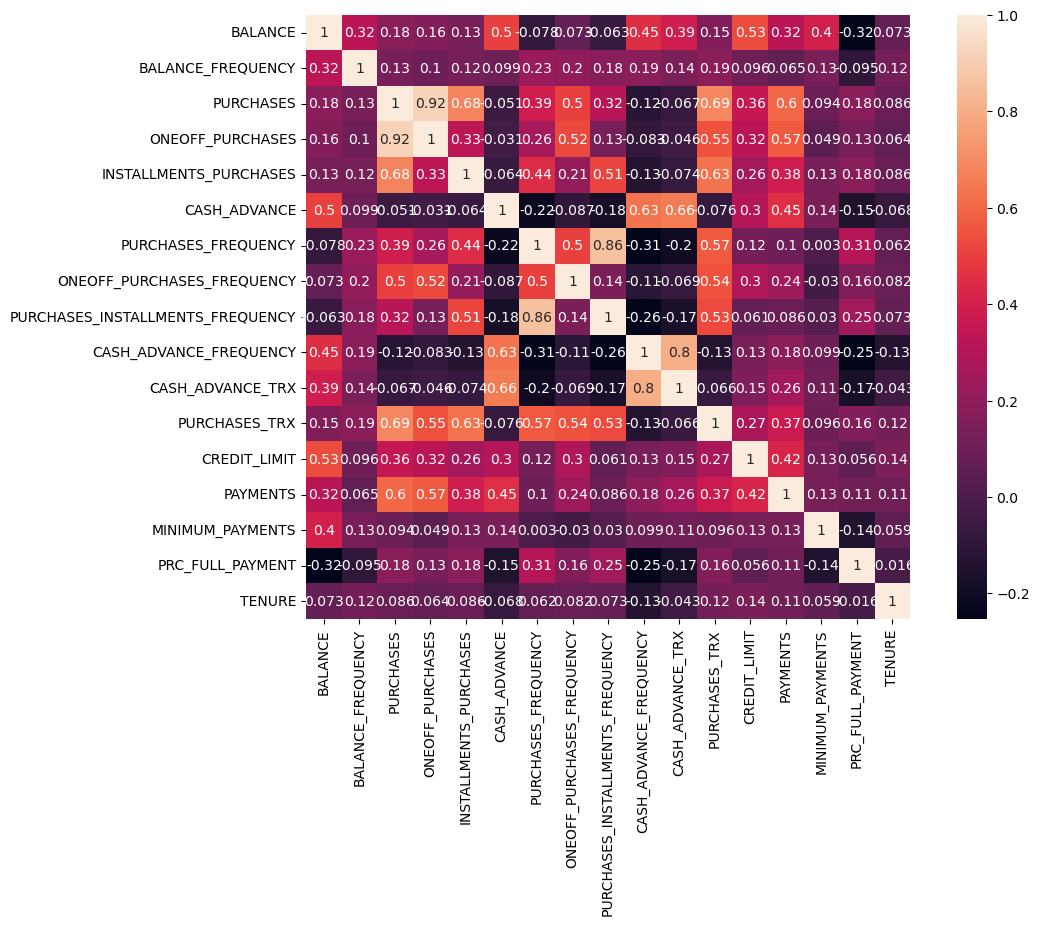

In [5]:
plt.figure(figsize=(12,8),dpi=100)
sns.heatmap(data.corr(),cbar=True,square=True,annot=True,robust=True)
plt.show()

In [6]:
data.isnull().sum().sort_values(ascending=False)
#data.isna().mean()*100

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
BALANCE                               0
CASH_ADVANCE_FREQUENCY                0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
PURCHASES_INSTALLMENTS_FREQUENCY      0
BALANCE_FREQUENCY                     0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
TENURE                                0
dtype: int64

In [7]:
data.dropna(subset=['CREDIT_LIMIT'], inplace=True)
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median(), inplace=True)

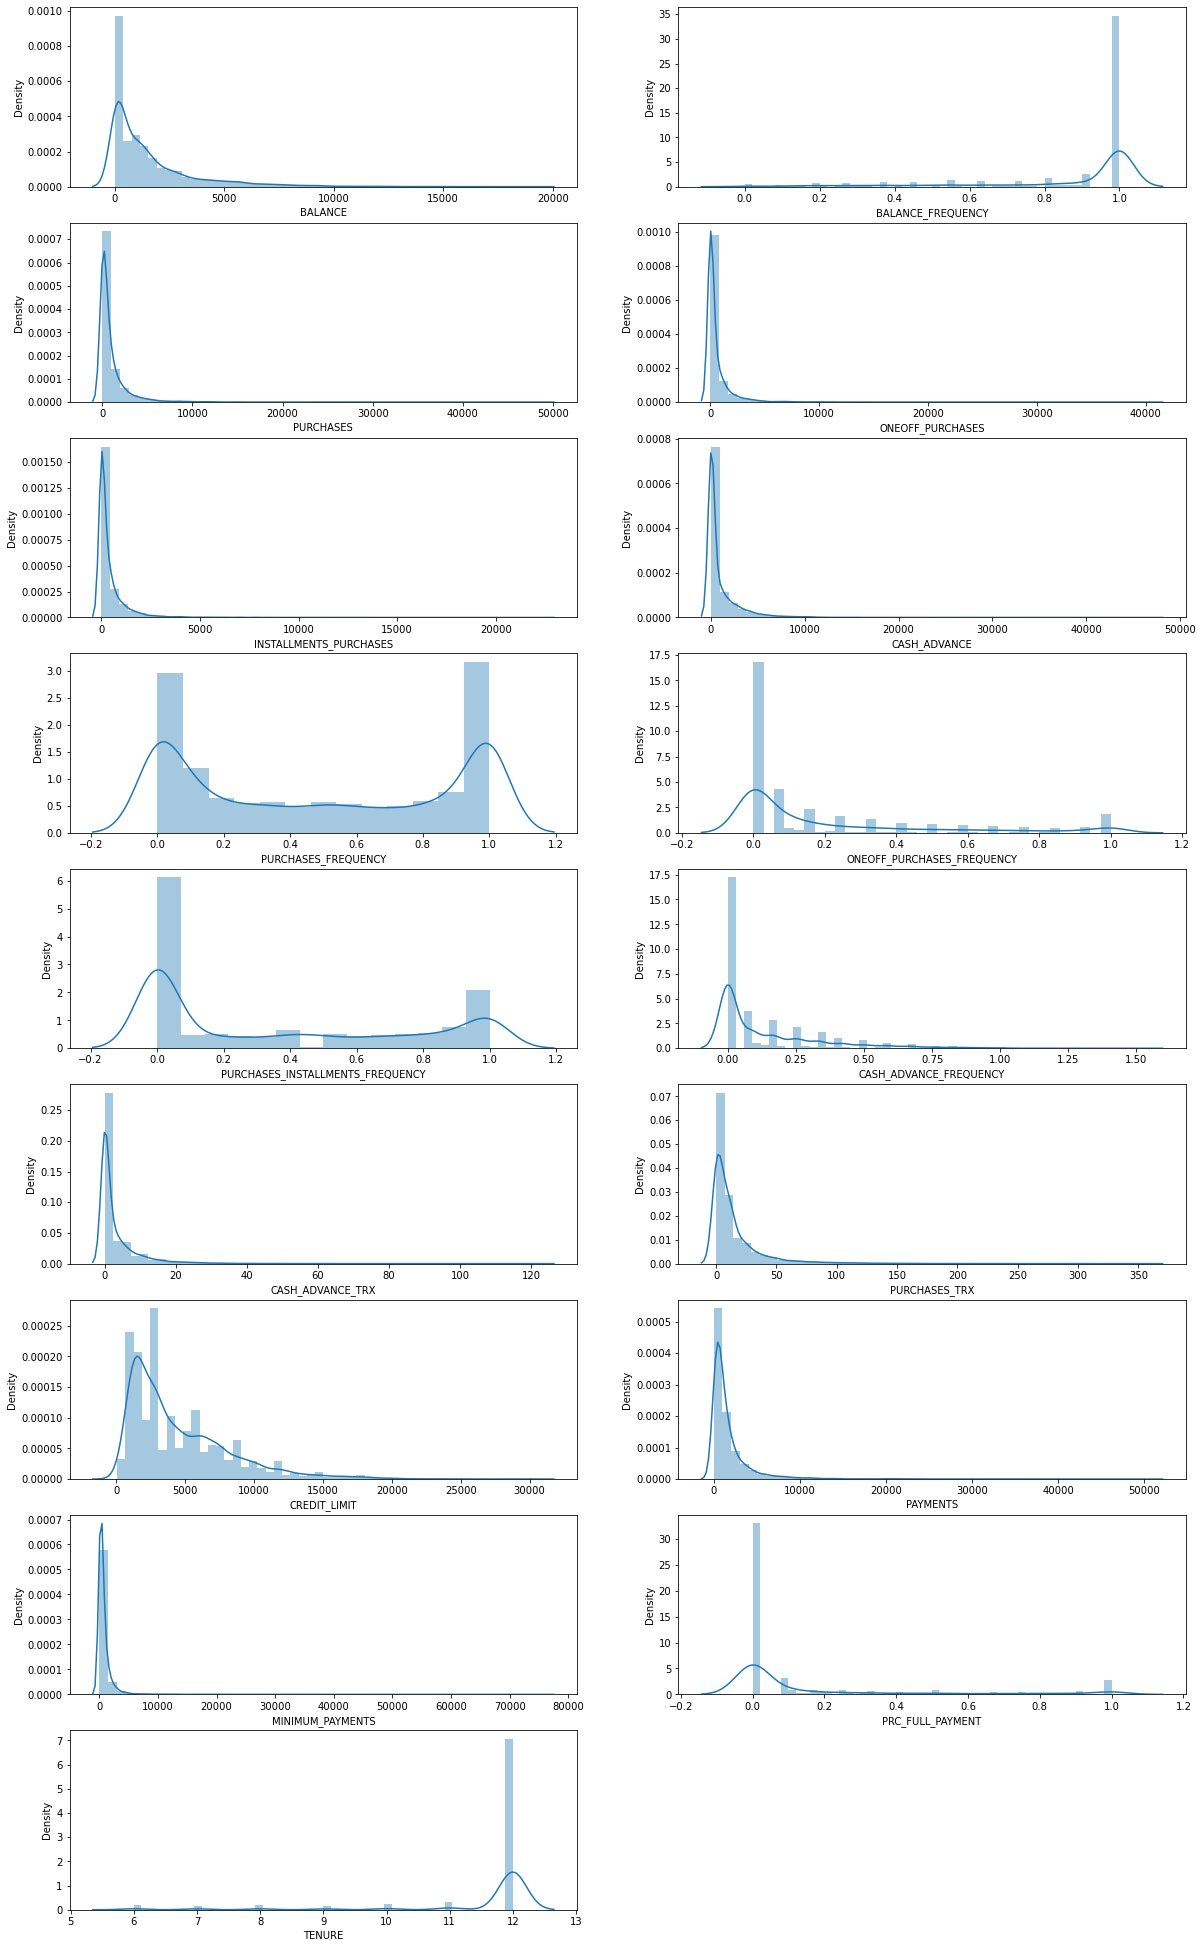

In [8]:
plt.figure(figsize=(20,35))
for i, col in enumerate(data.columns):
    if data[col].dtype != 'object':
        ax1 = plt.subplot(9, 2, i+1)
        sns.distplot(data[col], ax = ax1)
        plt.xlabel(col)
plt.show()

In [9]:
data1 = data.copy()
for c in data1:
    max3 = data1[c].median() + 3*data1[c].std()
    min3 = data1[c].median() - 3*data1[c].std()
    data1.loc[data1[c] > max3, c] = max3
    data1.loc[data1[c] < min3, c] = min3

In [10]:
X = np.asarray(data1)
scale = StandardScaler() 
X1 = scale.fit_transform(X)

100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:08<00:00,  1.59it/s]


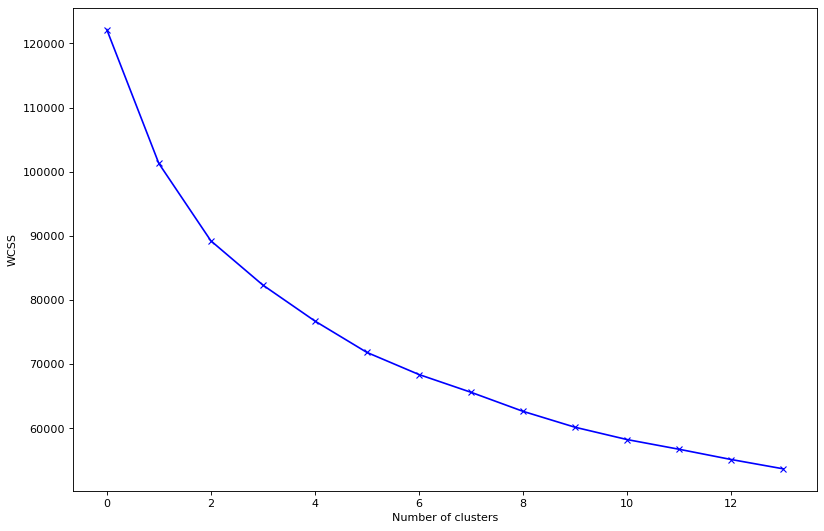

In [11]:
### Centroid-based clustering: k-means
cost = []
for i in tqdm(range(2, 16)):
    kmean = KMeans(i)
    kmean.fit(X1)
    cost.append(kmean.inertia_)  
plt.figure(figsize=(12,8),dpi=80)
plt.plot(cost, 'bx-')
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [12]:
kmean = KMeans(5)
kmean.fit(X1)
labels = kmean.labels_
clusters = pd.concat([data, pd.DataFrame({'cluster':labels})], axis=1)

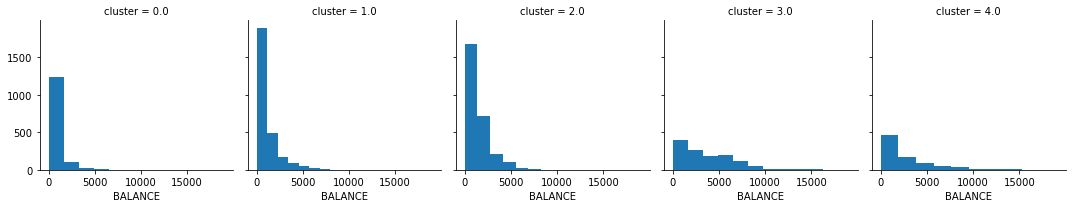

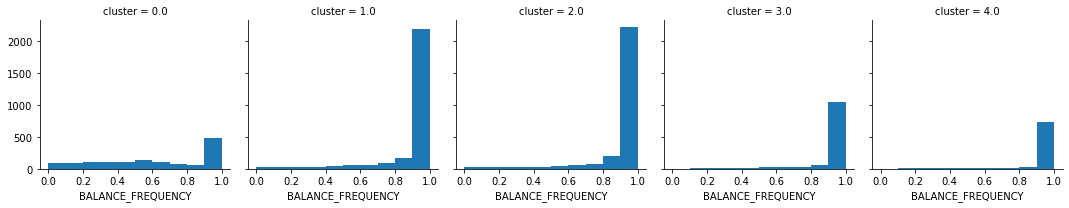

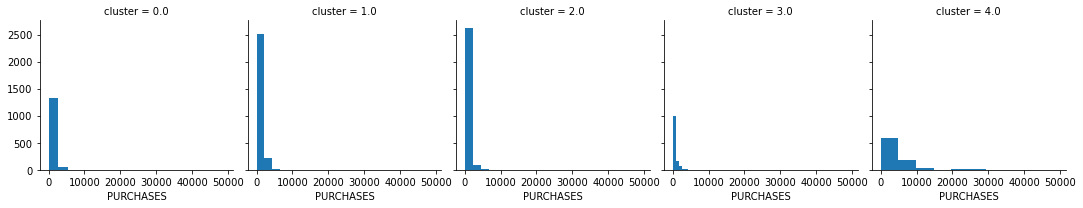

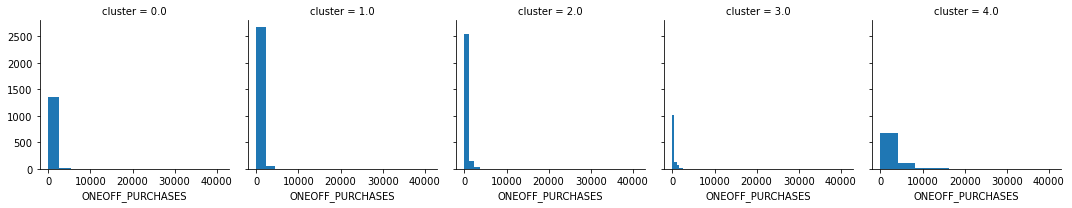

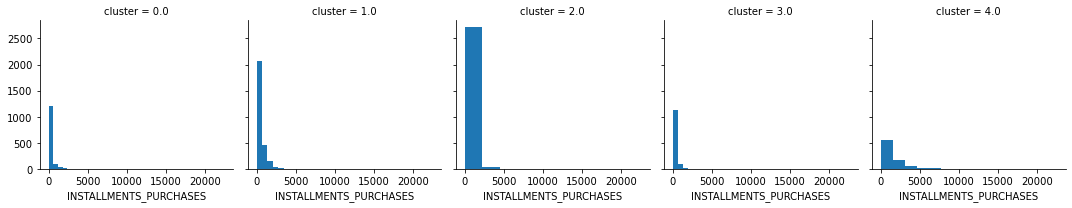

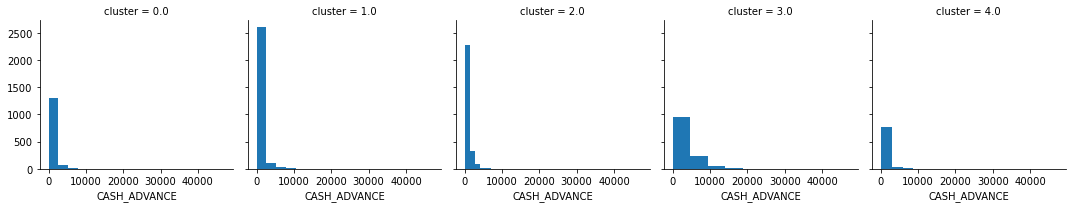

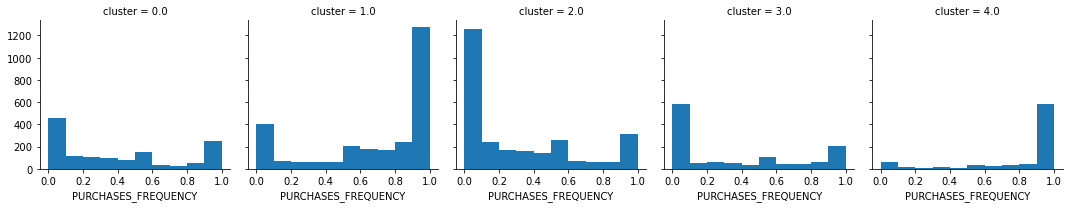

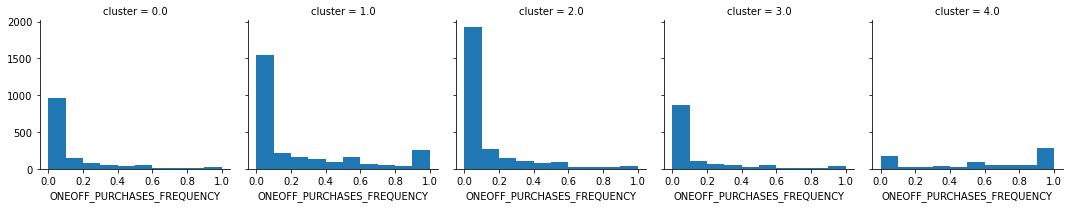

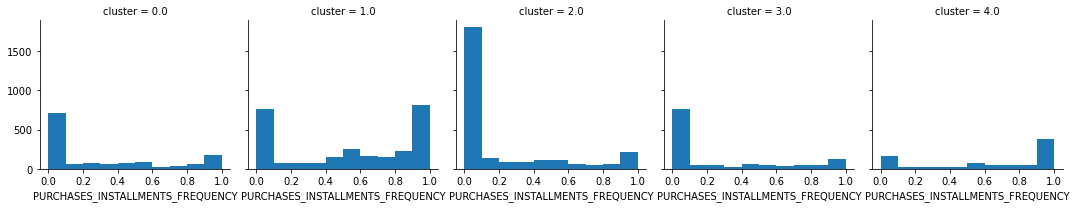

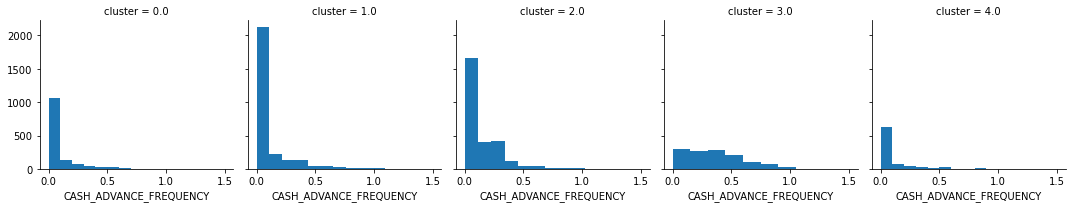

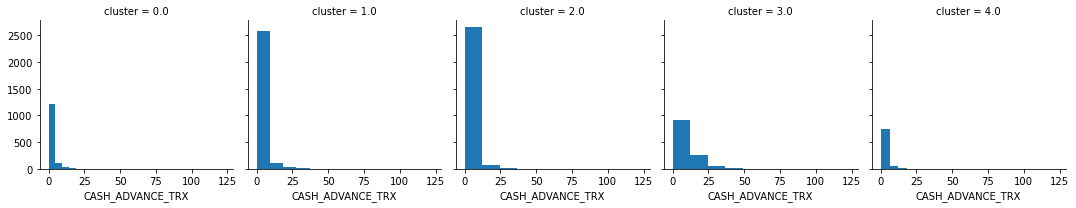

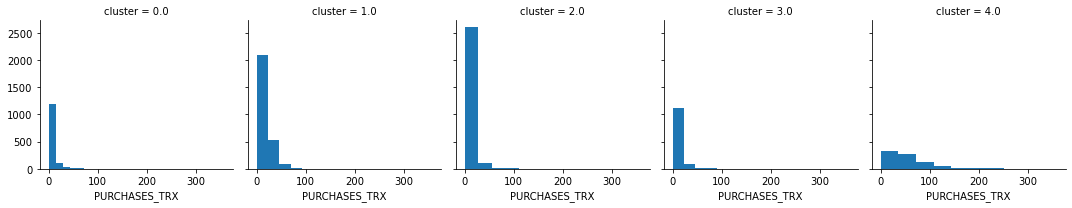

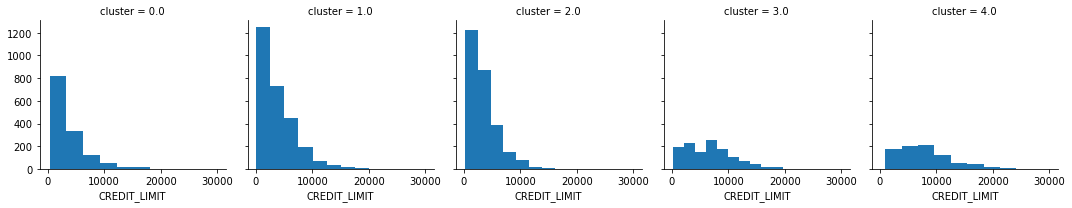

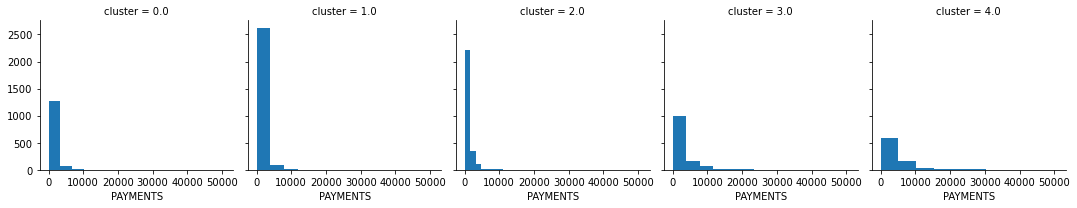

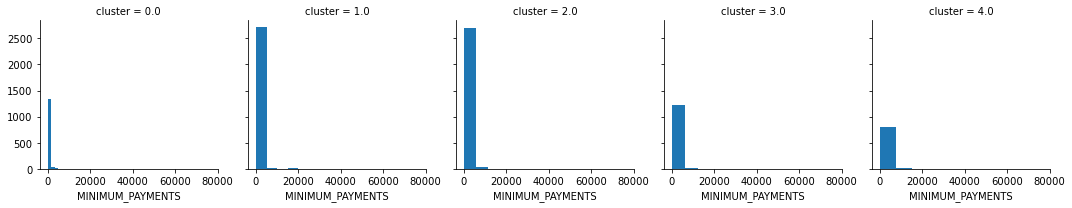

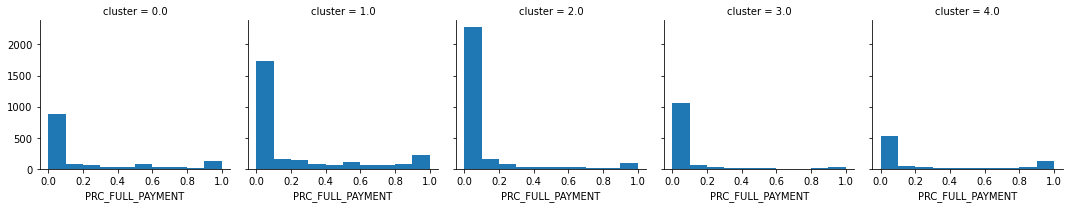

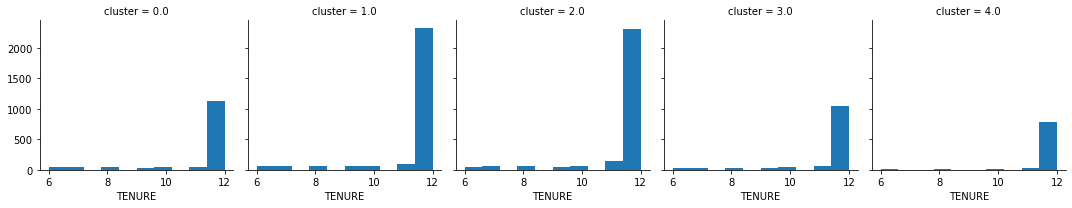

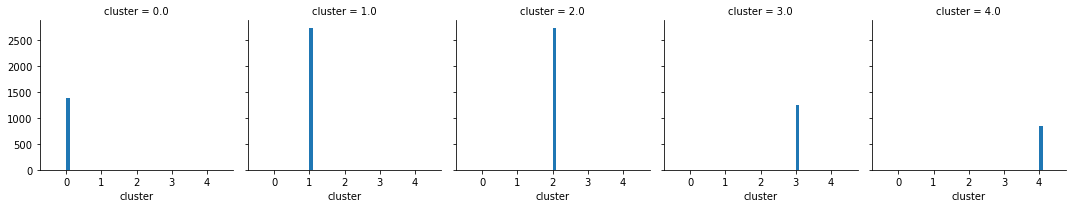

In [13]:
for c in clusters:
    grid = sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)

In [14]:
dist = 1 - cosine_similarity(X1)
pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)

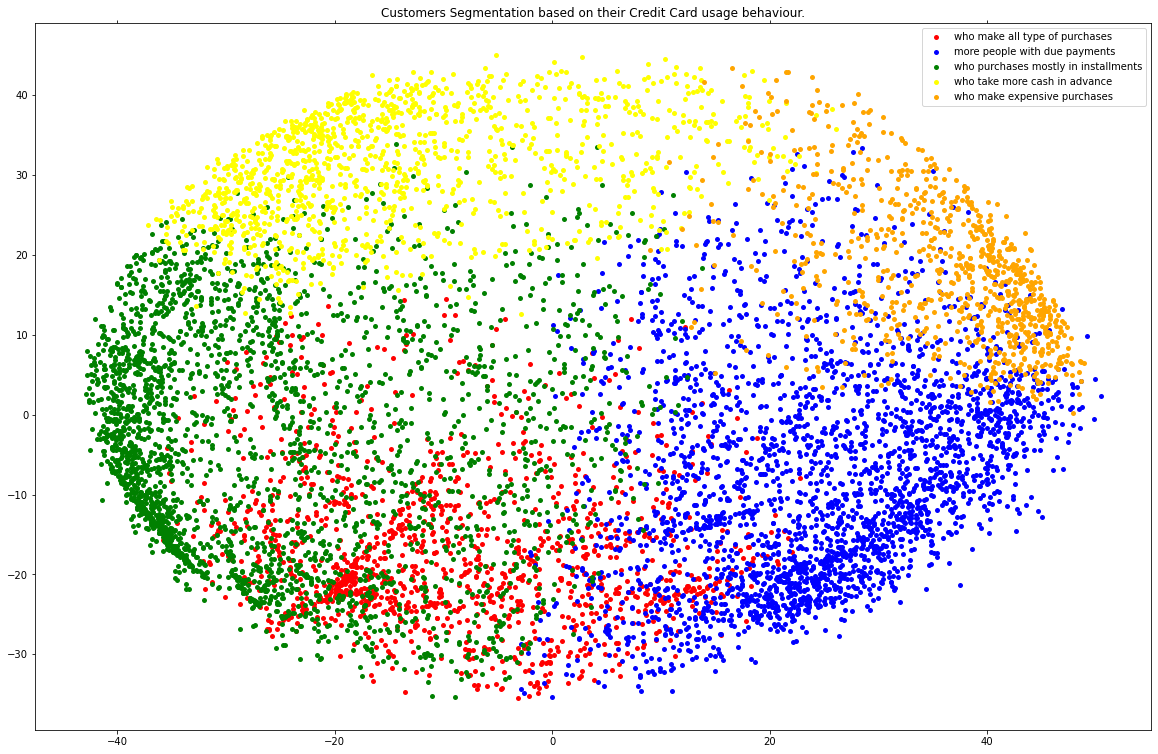

In [15]:
### visualization
x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {0: 'red',1: 'blue', 2: 'green', 3: 'yellow', 4: 'orange' }

###labels to be dicided
names = {0: 'who make all type of purchases', 1: 'more people with due payments', \
         2: 'who purchases mostly in installments', 3: 'who take more cash in advance', \
         4: 'who make expensive purchases'}
#,5:'who don\'t spend much money'}
  
df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Customers Segmentation based on their Credit Card usage behaviour.")
plt.show()

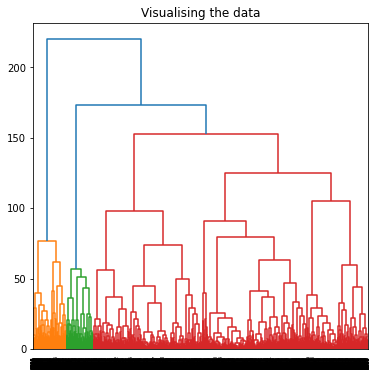

In [16]:
### Connectivity-based clustering: Agglomerative hierarchical clustering
plt.figure(figsize =(6, 6)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(X1, method ='ward'))) 

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [02:25<00:00,  7.66s/it]


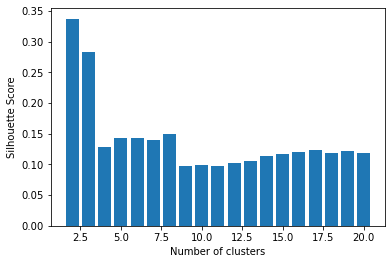

In [17]:
silhouette_scores = [] 

for n_cluster in tqdm(range(2, 11)):
    silhouette_scores.append(silhouette_score(X1, AgglomerativeClustering  \
                                              (n_clusters = n_cluster).fit_predict(X1))) 

# Plotting a bar graph to compare the results 
plt.bar(range(2,21), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

In [18]:
agg = AgglomerativeClustering(n_clusters=3)
agg.fit(X1)
labels2 = agg.labels_
clusters2 = pd.concat([data, pd.DataFrame({'cluster':labels2})], axis=1)

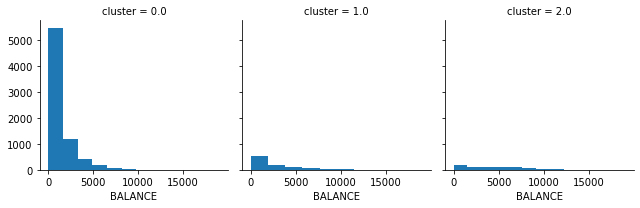

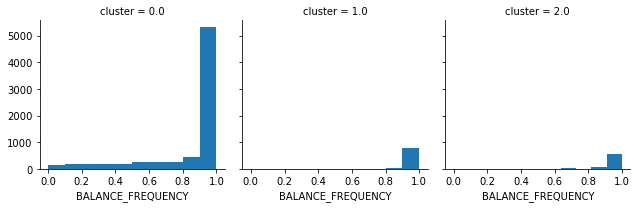

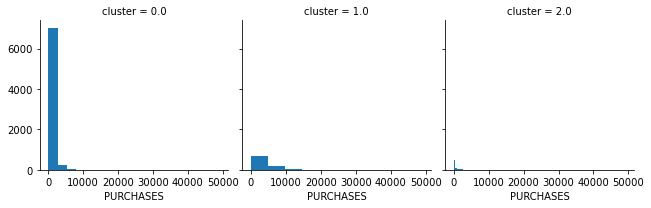

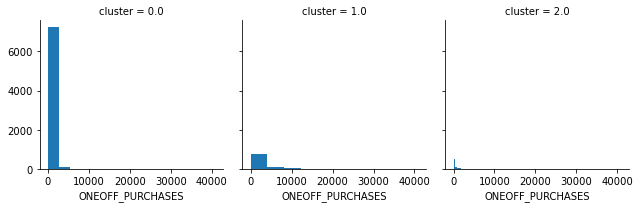

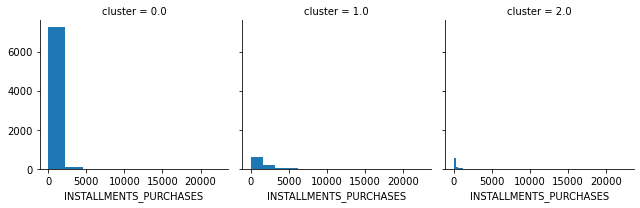

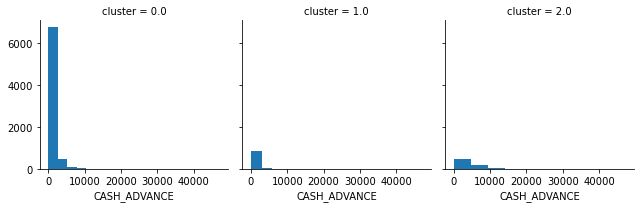

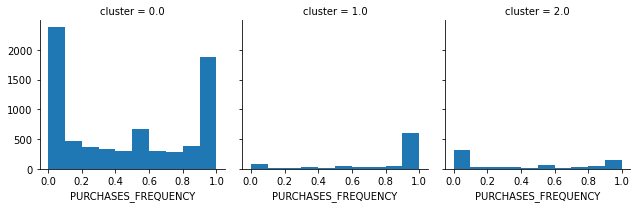

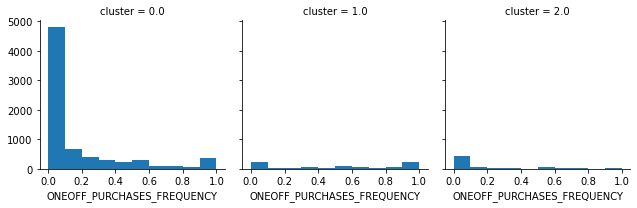

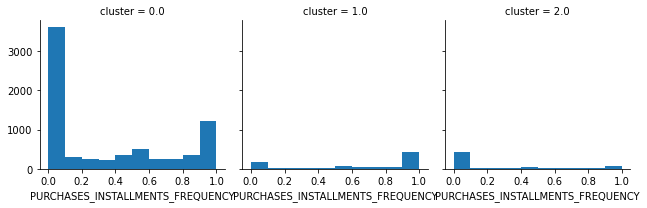

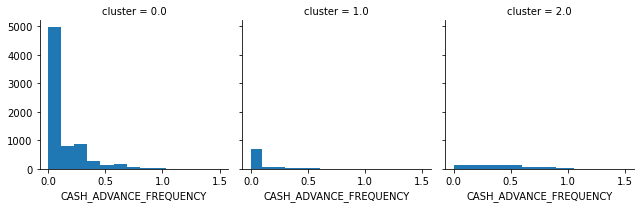

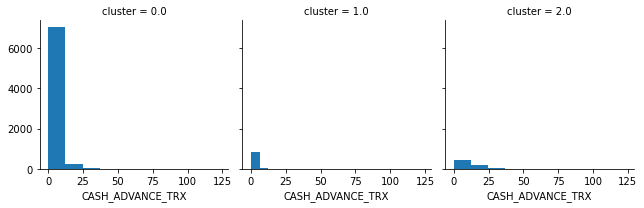

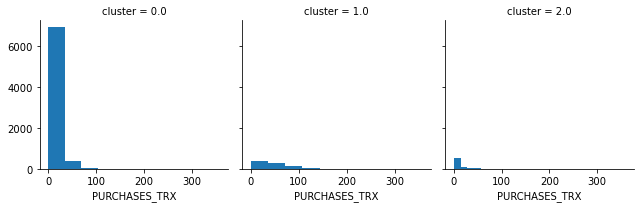

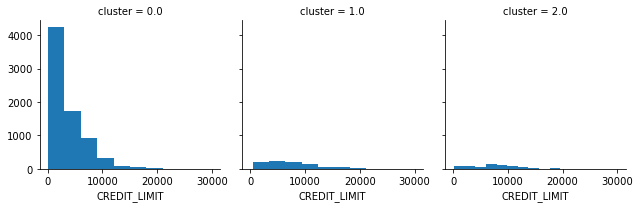

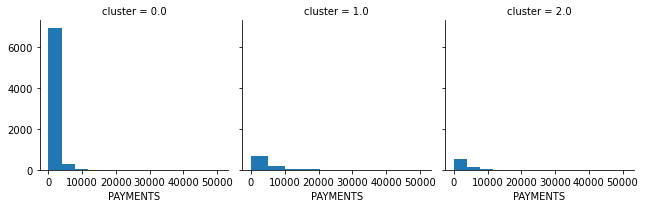

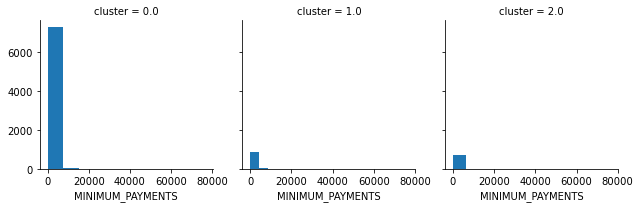

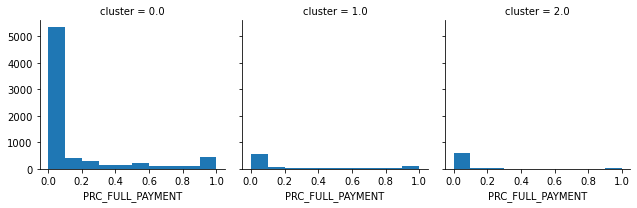

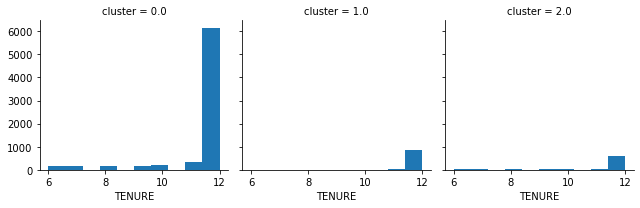

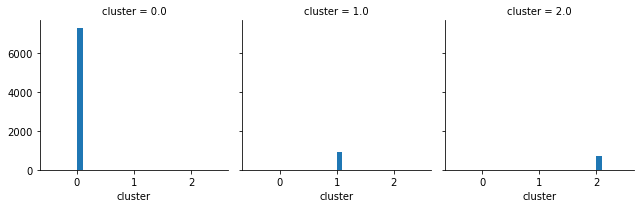

In [19]:
for c in clusters2:
    grid = sns.FacetGrid(clusters2, col='cluster')
    grid.map(plt.hist, c)

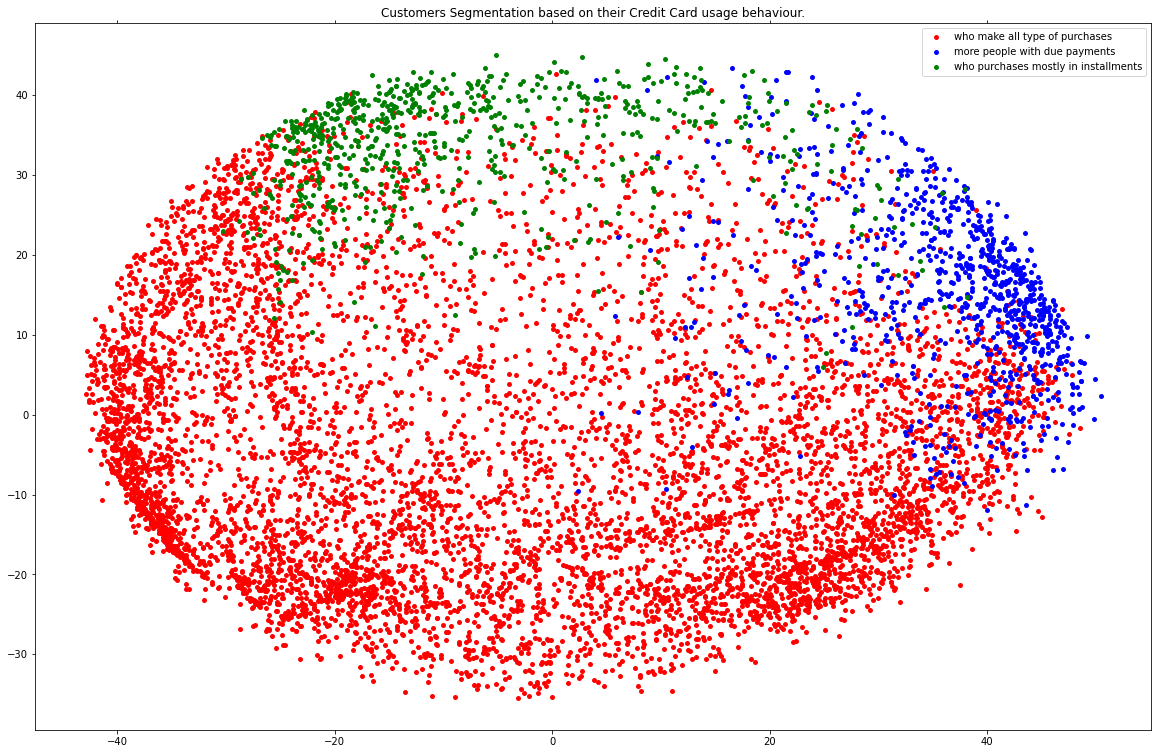

In [20]:
colors2 = {0: 'red',1: 'blue', 2: 'green'}
#, 3: 'yellow', 4: 'orange',  5:'purple'}

###labels to be dicided
names2 = {0: 'who make all type of purchases', 1: 'more people with due payments', \
         2: 'who purchases mostly in installments'}
#,3: 'who take more cash in advance', 4: 'who make expensive purchases',5:'who don\'t spend much money'}
  
df2 = pd.DataFrame({'x':x, 'y':y, 'label':labels2}) 
groups2 = df2.groupby('label')

fig2, ax2 = plt.subplots(figsize=(20, 13)) 

for name, group in groups2:
    ax2.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors2[name],label=names2[name], mec='none')
    ax2.set_aspect('auto')
    ax2.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax2.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax2.legend()
ax2.set_title("Customers Segmentation based on their Credit Card usage behaviour.")
plt.show()

In [21]:
### Distribution-based clustering: Gaussian Mixture Models Clustering
def SelBest(arr, X):
    '''
    returns the set of X configurations with shorter distance
    '''
    dx = np.argsort(arr)[:X]
    return arr[dx]

In [22]:
### Silhouette score 
n_clusters = np.arange(2, 11)
sils = []
sils_err = []
iterations = 20
for n in tqdm(n_clusters):
    tmp_sil = []
    for _ in range(iterations):
        gmm = GaussianMixture(n, n_init=2).fit(X1) 
        labels = gmm.predict(X1)
        sil = metrics.silhouette_score(X1, labels, metric='euclidean')
        tmp_sil.append(sil)
    val = np.mean(SelBest(np.array(tmp_sil), int(iterations/5)))
    err = np.std(tmp_sil)
    sils.append(val)
    sils_err.append(err)

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [13:03<00:00, 87.09s/it]


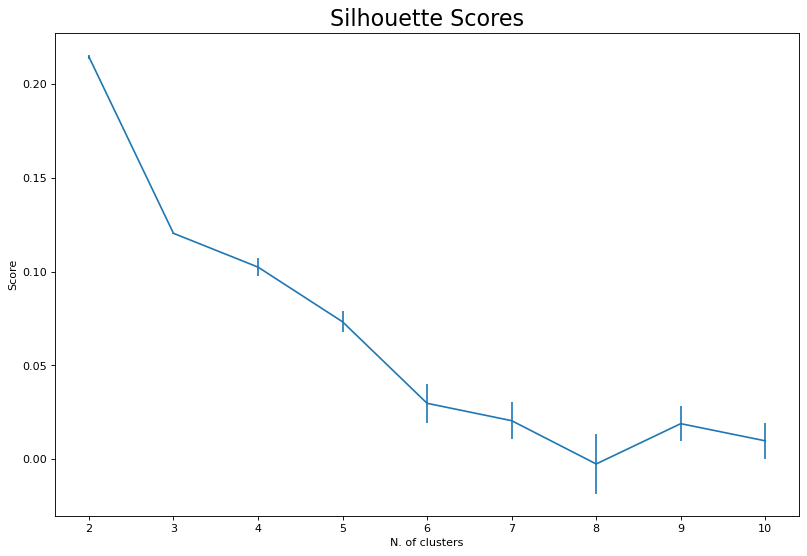

In [23]:
plt.figure(figsize=(12,8),dpi=80)
plt.errorbar(n_clusters, sils, yerr=sils_err)
plt.title("Silhouette Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")
plt.show()

In [24]:
def gmm_js(gmm_p, gmm_q, n_samples=10**5):
    X = gmm_p.sample(n_samples)[0]
    log_p_X = gmm_p.score_samples(X)
    log_q_X = gmm_q.score_samples(X)
    log_mix_X = np.logaddexp(log_p_X, log_q_X)

    Y = gmm_q.sample(n_samples)[0]
    log_p_Y = gmm_p.score_samples(Y)
    log_q_Y = gmm_q.score_samples(Y)
    log_mix_Y = np.logaddexp(log_p_Y, log_q_Y)

    return np.sqrt((log_p_X.mean() - (log_mix_X.mean() - np.log(2))
            + log_q_Y.mean() - (log_mix_Y.mean() - np.log(2))) / 2)

In [28]:
### Distance between GMMs
results = []
res_sigs = []
for n in tqdm(n_clusters):
    dist = []
    
    for iteration in range(iterations):
        train, test = train_test_split(X1, test_size=0.5)
        
        gmm_train = GaussianMixture(n, n_init=2).fit(train) 
        gmm_test = GaussianMixture(n, n_init=2).fit(test) 
        dist.append(gmm_js(gmm_train, gmm_test))
    selec = SelBest(np.array(dist), int(iterations/5))
    result = np.mean(selec)
    res_sig = np.std(selec)
    results.append(result)
    res_sigs.append(res_sig)

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [08:00<00:00, 53.41s/it]


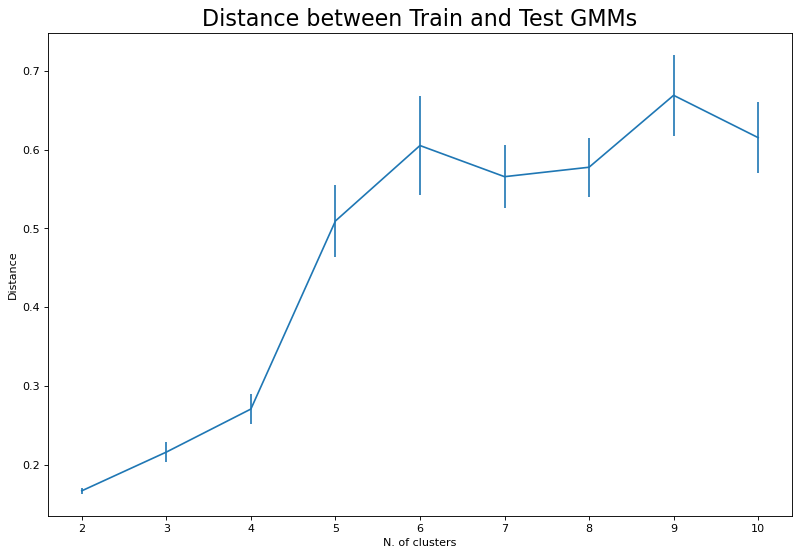

In [29]:
plt.figure(figsize=(12,8),dpi=80)
plt.errorbar(n_clusters, results, yerr=res_sigs)
plt.title("Distance between Train and Test GMMs", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Distance")
plt.show()

In [30]:
### Bayesian information criterion (BIC)
bics = []
bics_err = []
for n in n_clusters:
    tmp_bic = []
    for _ in range(iterations):
        gmm = GaussianMixture(n, n_init=2).fit(X1) 
        
        tmp_bic.append(gmm.bic(X1))
    val = np.mean(SelBest(np.array(tmp_bic), int(iterations/5)))
    err = np.std(tmp_bic)
    bics.append(val)
    bics_err.append(err)

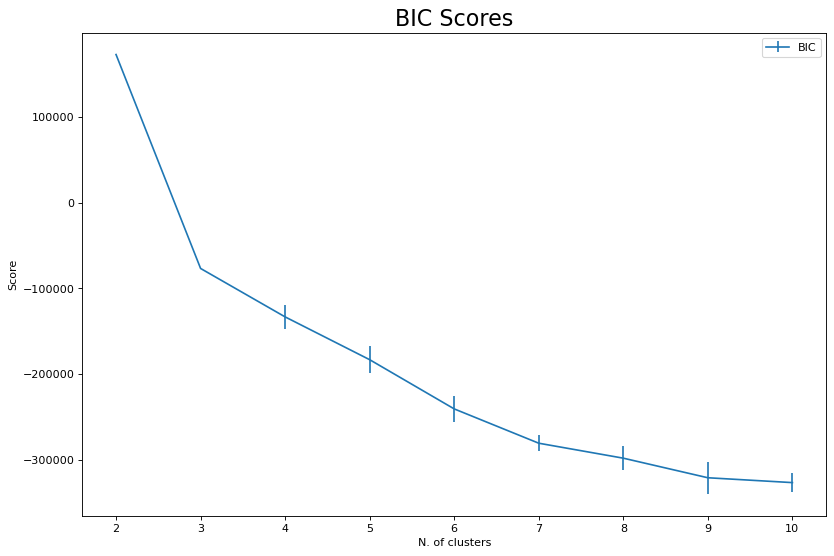

In [31]:
plt.figure(figsize=(12,8),dpi=80)
plt.errorbar(n_clusters,bics, yerr=bics_err, label='BIC')
plt.title("BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")
plt.legend()

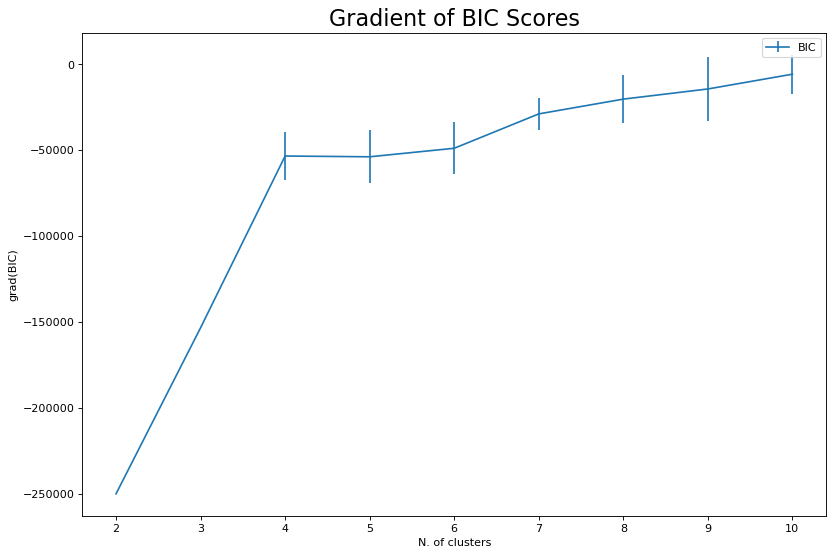

In [32]:
plt.figure(figsize=(12,8),dpi=80)
plt.errorbar(n_clusters, np.gradient(bics), yerr=bics_err, label='BIC')
plt.title("Gradient of BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("grad(BIC)")
plt.legend()

In [36]:
gmm = GaussianMixture(n_components = 3) 
labels3 = gmm.fit_predict(X1)
clusters3 = pd.concat([data, pd.DataFrame({'cluster':labels3})], axis=1)

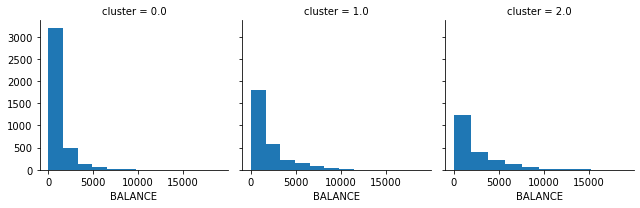

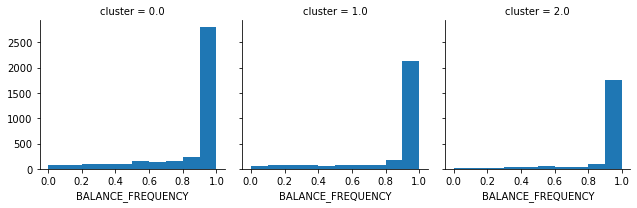

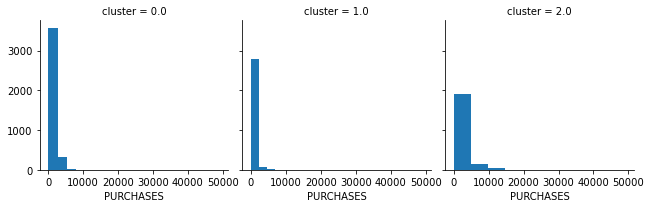

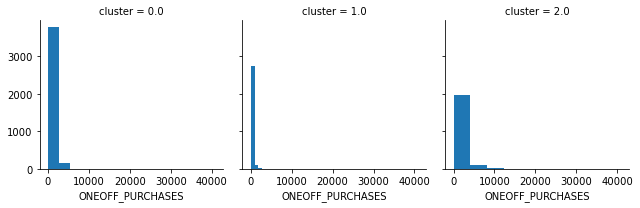

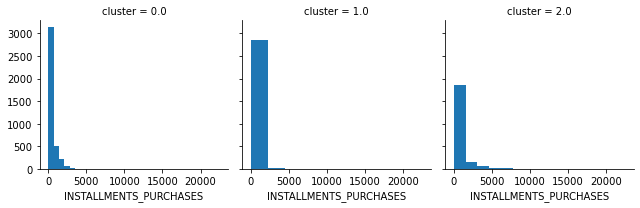

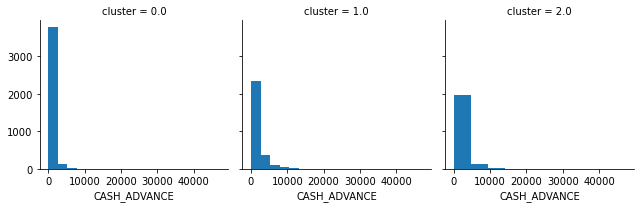

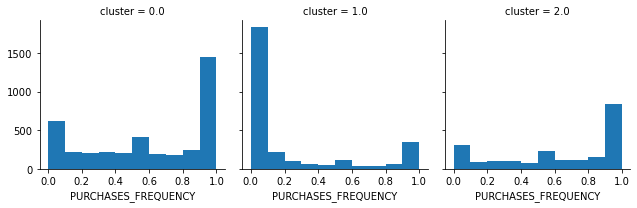

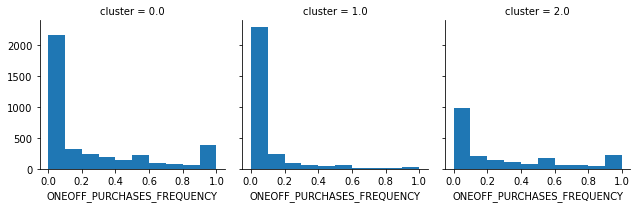

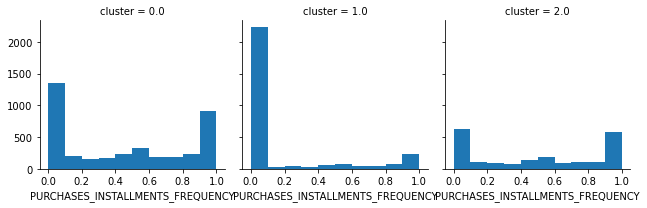

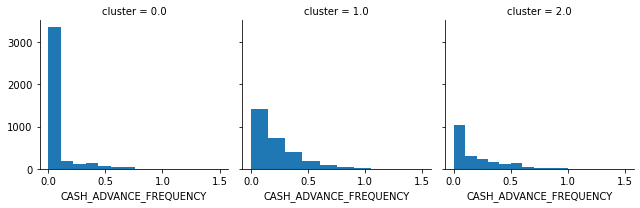

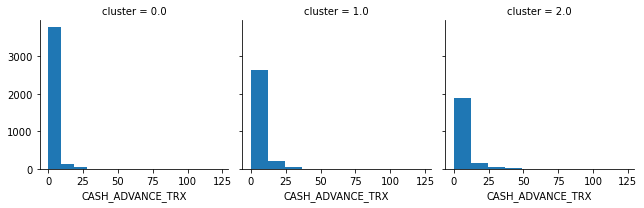

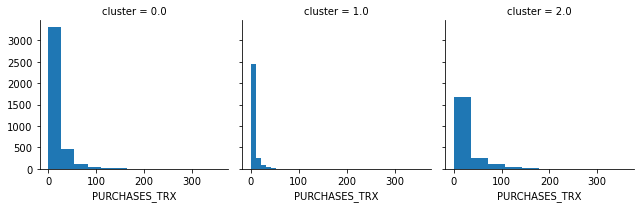

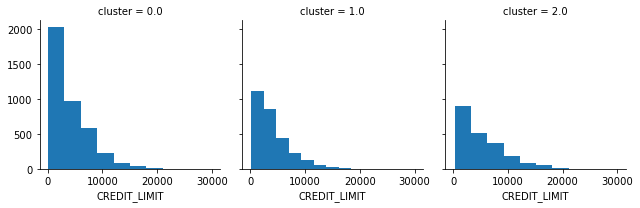

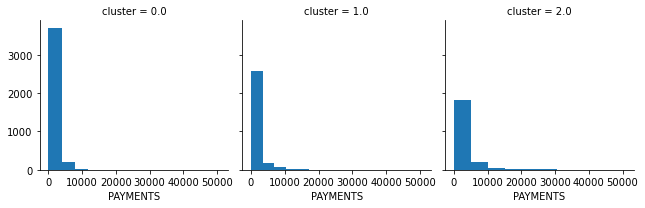

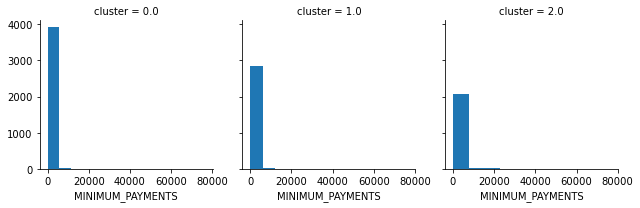

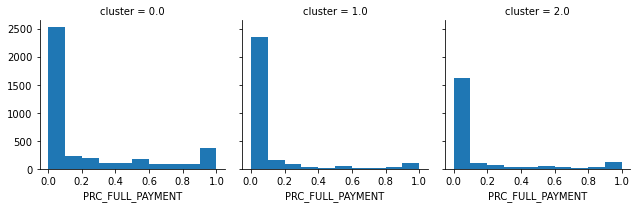

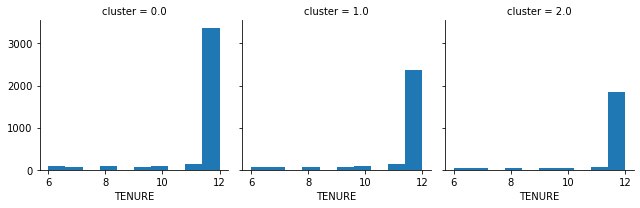

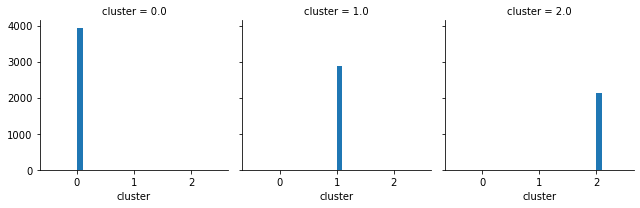

In [37]:
for c in clusters3:
    grid = sns.FacetGrid(clusters3, col='cluster')
    grid.map(plt.hist, c)

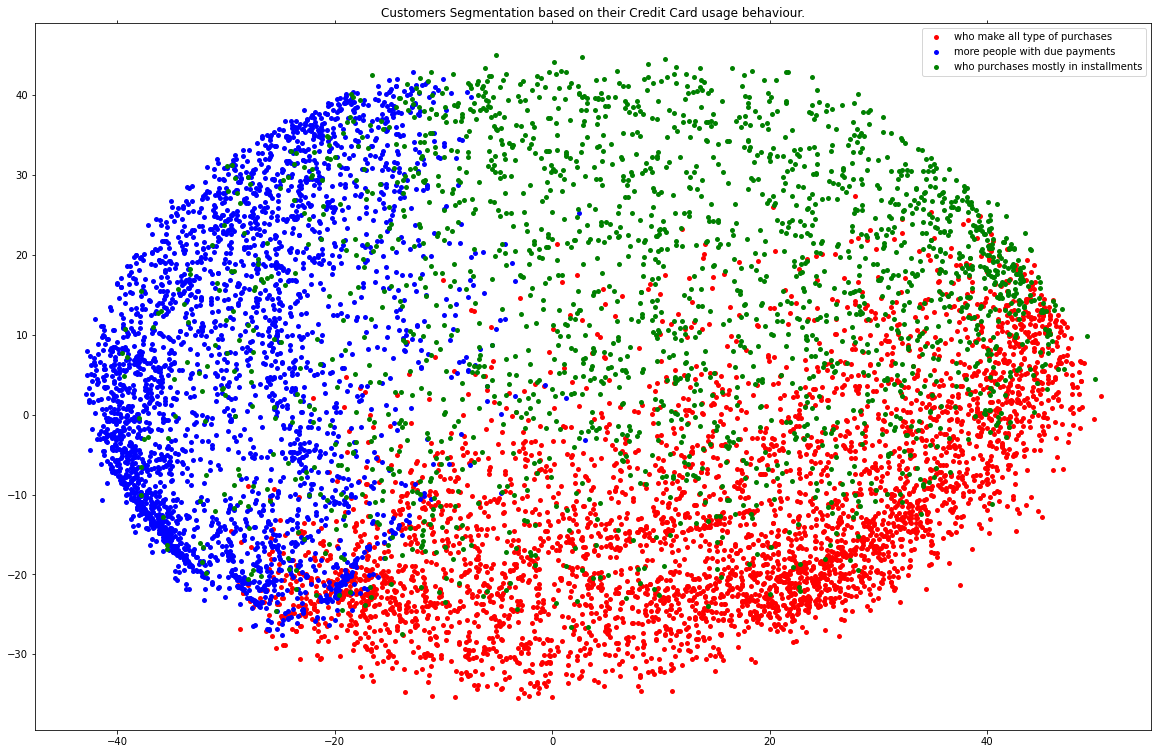

In [38]:
colors3 = {0: 'red',1: 'blue', 2: 'green'}
#, 3: 'yellow', 4: 'orange',  5:'purple'}

###labels to be dicided
names3 = {0: 'who make all type of purchases', 1: 'more people with due payments', \
         2: 'who purchases mostly in installments'}
#,3: 'who take more cash in advance', 4: 'who make expensive purchases',5:'who don\'t spend much money'}
  
df3 = pd.DataFrame({'x':x, 'y':y, 'label':labels3}) 
groups3 = df3.groupby('label')

fig3, ax3 = plt.subplots(figsize=(20, 13)) 

for name, group in groups3:
    ax3.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors2[name],label=names2[name], mec='none')
    ax3.set_aspect('auto')
    ax3.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax3.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax3.legend()
ax3.set_title("Customers Segmentation based on their Credit Card usage behaviour.")
plt.show()